# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is a project to invesigate a dataset from the International Movie Database (IMDB). This will entail three phases: wrangling which involves cleaning the data, Exploratory Data Analysis to observe trends in the data and Reporting the observation. This will be done using popular python libraies like NumPy, Pandas and Matplotlib. 
We will answer the following research questions:
<li>What movies have the highest and lowest profits</li>
<li>What movies have the highest and lowest revenues</li>
<li>What movies have the highest and lowest budgets</li>
<li>What movies have the highest and least runtimes</li>
<li>What are the top 5 actors</li>
<li>What are the top 5 movie genres</li>

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import operator

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, data is checked for cleanliness, and then further cleaned for analysis.

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("tmdb-movies.csv")
#   types and look for instances of missing or possibly errant data.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

#### Step 1: Remove undesired columns

In [3]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#During this phase, we shall be performing the following steps.

df = df.drop(['imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average'],1)


In [4]:
df.head(2)

,id,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015


#### Step 2: Remove duplicate records

In [5]:
#Removing duplicate records from the dataset
df.drop_duplicates(inplace=True)
df.shape

(10865, 11)

#### Step 3: Remove null values from desired columns

In [6]:
df = df[df['cast'].isnull() == False]
df = df[df['genres'].isnull() == False]

#### Step 4: Remove zero values from revenue and budget

In [7]:
df[['budget', 'revenue']] = df[['budget', 'revenue']].replace(0, np.NAN)

In [8]:
#### Step 5: Remove rows with NaN

In [9]:
df.dropna(inplace = True)

In [10]:
#Exploring the dataframe, the budget and the revenue columns contain zeros, this is undesired so we choose
#a strategy of replacing it with the mean
#getting the mean

<a id='eda'></a>
## Exploratory Data Analysis

> Here we will compute statistics and create visualizations with the goal of addressing each research question. We will look at one variable at a time, and then further follow it up by looking at relationships between variables.

### Summary of Movies with the highest and lowest profit

In [11]:
# Insert a new column to the dataframe called profit
df.insert(2,'profit',df['revenue']-df['budget'])

In [12]:
#implementing the profit calculator
def range_calculator(col):
   higehest_profit_info=pd.DataFrame(df.loc[df[col].idxmax()])
   lowest_profit_info=pd.DataFrame(df.loc[df[col].idxmin()])
   info=pd.concat([higehest_profit_info, lowest_profit_info], axis=1)
   return info
range_calculator('profit')

,1386,2244
id,19995,46528
budget,2.37e+08,4.25e+08
profit,2.54451e+09,-4.13912e+08
revenue,2.78151e+09,1.10876e+07
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


### Summary of Movies with the Highest and Lowest Budget

In [13]:
# Calculate summary of movies with the highest and lowest budget using range_calculator
range_calculator('budget')

,2244,2618
id,46528,39964
budget,4.25e+08,1
profit,-4.13912e+08,99
revenue,1.10876e+07,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


### Summary of Movies with the Highest and Lowest Revenue

In [14]:
# Calculate summary of movies with the highest and lowest revenue using range_calculator
range_calculator('revenue')

,1386,8142
id,19995,2293
budget,2.37e+08,6e+06
profit,2.54451e+09,-6e+06
revenue,2.78151e+09,2
original_title,Avatar,Mallrats
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Lee|Jeremy London|Shannen Doherty|Claire...
director,James Cameron,Kevin Smith
tagline,Enter the World of Pandora.,They're not there to shop. They're not there t...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Romance|Comedy


### Summary of Movies with the Highest and Lowest Runtimes

In [15]:
# Calculate summary of movies with the highest and lowest revenue using range_calculator
range_calculator('runtime')

,2107,8005
id,43434,14813
budget,1.8e+07,3e+06
profit,-1.71287e+07,1.8e+07
revenue,871279,2.1e+07
original_title,Carlos,Mickey's Christmas Carol
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Alan Young|Wayne Allwine|Clarence Nash|Hal Smi...
director,Olivier Assayas,Burny Mattinson
tagline,The man who hijacked the world,He's back! Mickey Mouse - in his first new mot...
runtime,338,26
genres,Crime|Drama|Thriller|History,Family|Animation


#### Plotting a histogram of runtime of movies

,count,mean,max
genres,,,
Comedy,217.0,2.765101e+07,112000000.0
Comedy|Romance,96.0,2.980325e+07,100000000.0
Drama,208.0,2.303725e+07,130000000.0
Drama|Romance,92.0,1.984334e+07,105000000.0
Horror|Thriller,80.0,1.192879e+07,65000000.0


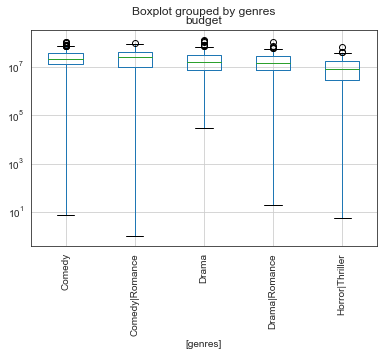

In [16]:
df_1 = df.groupby(['genres'])[['id']].count().sort_values(by=['id'], ascending=False)[0:5]
df_new = df[df['genres'].isin(df_1.index.values.tolist())]
df_new1 = df_new[df_new['budget']>0]
df_new1.boxplot(column=['budget'], by =['genres'], rot=90).set_yscale('log')
pd.DataFrame(df_new1.groupby(['genres'])['budget'].describe().loc[:, ['count','mean','max']])

,id
genres,
Comedy,217
Comedy|Romance,96
Drama,208
Drama|Romance,92
Horror|Thriller,80


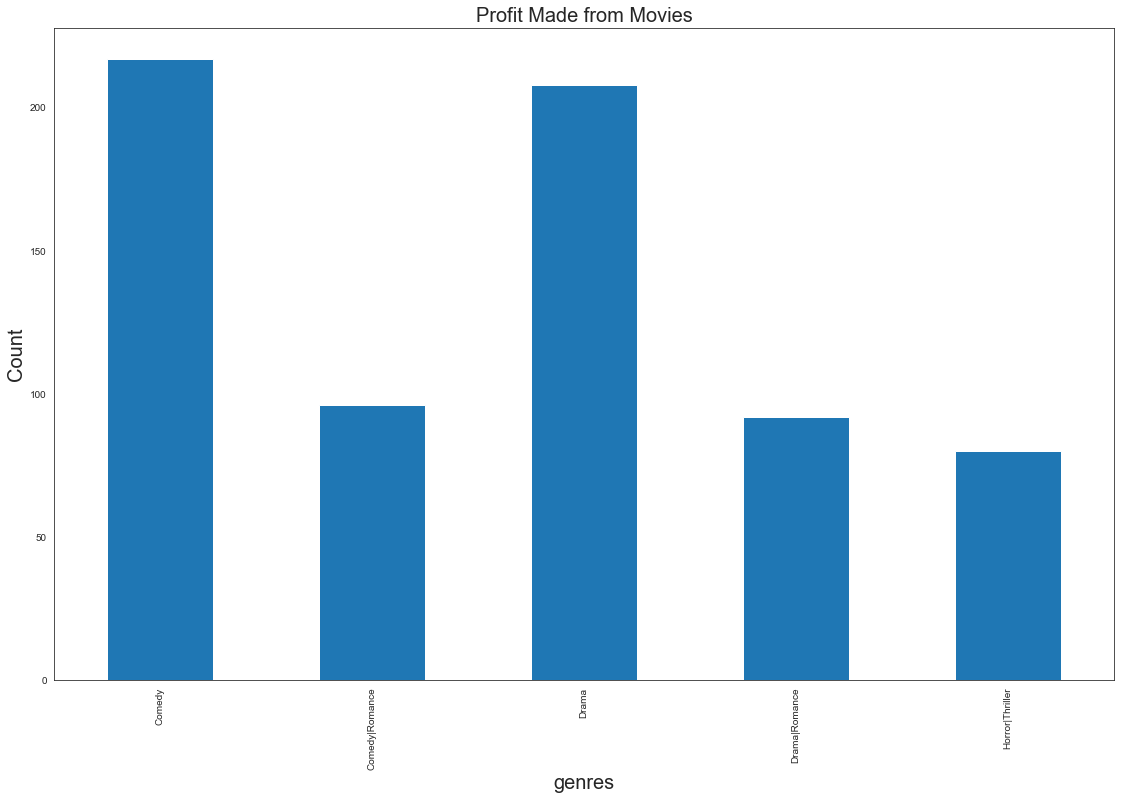

In [54]:
#giving the figure size(width, height)
plt.figure(figsize=(19,12))
plt.xlabel('Profit made from Movies', fontsize = 20)
plt.title('Profit Made from Movies', fontsize=20)
plt.ylabel('Count', fontsize=20)
# plt.show()
df_new1.groupby(['genres'])['id'].count().plot(kind='bar', by=['genres'])
df_new1.groupby(['genres'])[['id']].count()

### A box plot of genres and budget 

,count,mean,max
genres,,,
Comedy,217.0,2.765101e+07,112000000.0
Comedy|Romance,96.0,2.980325e+07,100000000.0
Drama,208.0,2.303725e+07,130000000.0
Drama|Romance,92.0,1.984334e+07,105000000.0
Horror|Thriller,80.0,1.192879e+07,65000000.0


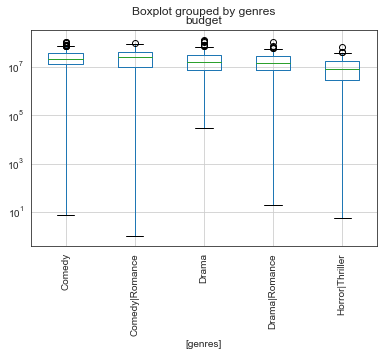

In [18]:
df_1 = df.groupby(['genres'])[['id']].count().sort_values(by=['id'], ascending=False)[0:5]
df_new = df[df['genres'].isin(df_1.index.values.tolist())]
df_new1 = df_new[df_new['budget']>0]
df_new1.boxplot(column=['budget'], by =['genres'], rot=90).set_yscale('log')
pd.DataFrame(df_new1.groupby(['genres'])['budget'].describe().loc[:, ['count','mean','max']])

### Top 5 Movies Genres

In [19]:
#A functions that strips individual items based on the "|"
#and then creates a dictionary of items to produce top 5 items from the dictionary

def calculate_top_5(column):
    list_stuffs = {}

    stuffs = df[column]
    stuffs = stuffs.str.split("|")
    stuffs = np.array(stuffs)
    for itemList in stuffs:
        for stuff in itemList:
                stuff = stuff.lstrip() #trim the whitespaces
                if stuff not in list_stuffs:
                    list_stuffs[stuff] = 1
                else:
                    list_stuffs[stuff] += 1



    sorted_list_stuffs = sorted(list_stuffs.items(), key = operator.itemgetter(1), reverse = True)
    return sorted_list_stuffs[0:5]

In [20]:
calculate_top_5('genres')

[('Drama', 1572),
 ('Comedy', 1255),
 ('Thriller', 1149),
 ('Action', 1046),
 ('Adventure', 720)]

### Top 5 Actors that Appear Most

In [28]:
calculate_top_5('cast')

[('Robert De Niro', 50),
 ('Bruce Willis', 44),
 ('Samuel L. Jackson', 43),
 ('Nicolas Cage', 41),
 ('Matt Damon', 35)]

### Correlation Between Datasets using a Pair plot

Empty DataFrame
Columns: []
Index: [(Action, -58067057.0, 76932943.0, 135000000.0, 121), (Action, -39255262.0, 54744738.0, 94000000.0, 116), (Action, -14988268.0, 55011732.0, 70000000.0, 139), (Action, -14177139.0, 30822861.0, 45000000.0, 99), (Action, -2716629.0, 3283371.0, 6000000.0, 99), (Action, 608545.0, 15608545.0, 15000000.0, 96), (Action, 6546197.0, 46546197.0, 40000000.0, 84), (Action, 7465299.0, 45465299.0, 38000000.0, 111), (Action, 10306119.0, 11806119.0, 1500000.0, 92), (Action, 13681566.0, 56681566.0, 43000000.0, 97), (Action, 27784194.0, 87784194.0, 60000000.0, 127), (Action, 30795814.0, 58795814.0, 28000000.0, 102), (Action, 50416905.0, 85416905.0, 35000000.0, 100), (Action, 69185582.0, 98185582.0, 29000000.0, 102), (Action, 82944923.0, 162944923.0, 80000000.0, 128), (Action, 96000000.0, 136000000.0, 40000000.0, 110), (Action, 110669540.0, 310669540.0, 200000000.0, 140), (Action, 207448382.0, 277448382.0, 70000000.0, 124), (Action, 532330139.0, 682330139.0, 150000000.0, 131), (Action|Adventure, -79482678.0, 18517322.0, 98000000.0, 119), (Action|Adventure, -8720548.0, 61279452.0, 70000000.0, 99), (Action|Adventure, -1000000.0, 7500000.0, 8500000.0, 90), (Action|Adventure, 27400547.0, 57400547.0, 30000000.0, 95), (Action|Adventure, 79563118.0, 84563118.0, 5000000.0, 117), (Action|Adventure, 143400000.0, 243400000.0, 100000000.0, 99), (Action|Adventure|Animation|Family|Fantasy, 424987477.0, 554987477.0, 130000000.0, 90), (Action|Adventure|Animation|Family|Science Fiction, 539442092.0, 631442092.0, 92000000.0, 115), (Action|Adventure|Animation|Science Fiction, 1731128.0, 5231128.0, 3500000.0, 75), (Action|Adventure|Animation|Science Fiction|Thriller, 18428063.0, 48428063.0, 30000000.0, 79), (Action|Adventure|Comedy, -47781920.0, 17218080.0, 65000000.0, 100), (Action|Adventure|Comedy, -37821105.0, 72178895.0, 110000000.0, 120), (Action|Adventure|Comedy, -12335441.0, 47664559.0, 60000000.0, 112), (Action|Adventure|Comedy, -12261773.0, 238227.0, 12500000.0, 100), (Action|Adventure|Comedy, -3890000.0, 6110000.0, 10000000.0, 90), (Action|Adventure|Comedy, 8408614.0, 63408614.0, 55000000.0, 104), (Action|Adventure|Comedy, 11482931.0, 25482931.0, 14000000.0, 95), (Action|Adventure|Comedy, 23898845.0, 53898845.0, 30000000.0, 105), (Action|Adventure|Comedy, 24350000.0, 29950000.0, 5600000.0, 138), (Action|Adventure|Comedy, 33000000.0, 108000000.0, 75000000.0, 114), (Action|Adventure|Comedy, 45000000.0, 71000000.0, 26000000.0, 106), (Action|Adventure|Comedy, 54817939.0, 79817939.0, 25000000.0, 94), (Action|Adventure|Comedy, 60803676.0, 110803676.0, 50000000.0, 104), (Action|Adventure|Comedy, 66865564.0, 86865564.0, 20000000.0, 86), (Action|Adventure|Comedy|Crime, 10342161.0, 20342161.0, 10000000.0, 84), (Action|Adventure|Comedy|Crime, 59649227.0, 78247647.0, 18598420.0, 101), (Action|Adventure|Comedy|Crime, 139175788.0, 259175788.0, 120000000.0, 106), (Action|Adventure|Comedy|Crime|Drama, 13256975.0, 20256975.0, 7000000.0, 96), (Action|Adventure|Comedy|Crime|Drama, 145444603.0, 285444603.0, 140000000.0, 127), (Action|Adventure|Comedy|Crime|Thriller, -23012437.0, 31987563.0, 55000000.0, 117), (Action|Adventure|Comedy|Crime|Thriller, 13664962.0, 71664962.0, 58000000.0, 111), (Action|Adventure|Comedy|Crime|Thriller, 172105545.0, 264105545.0, 92000000.0, 98), (Action|Adventure|Comedy|Crime|Thriller, 202853986.0, 227853986.0, 25000000.0, 114), (Action|Adventure|Comedy|Drama, 15754284.0, 25754284.0, 10000000.0, 108), (Action|Adventure|Comedy|Drama|Family, 49141030.0, 61141030.0, 12000000.0, 93), (Action|Adventure|Comedy|Drama|Mystery, -10730514.0, 119269486.0, 130000000.0, 124), (Action|Adventure|Comedy|Drama|Science Fiction, -16625257.0, 374743.0, 17000000.0, 144), (Action|Adventure|Comedy|Drama|Science Fiction, 52104681.0, 222104681.0, 170000000.0, 106), (Action|Adventure|Comedy|Drama|Western, 98033791.0, 124033791.0, 26000000.0, 112), (Action|Adventure|Comedy|Family, -33328495.0, 16671505.0, 50000000.0, 99), (Action|Adventure|C

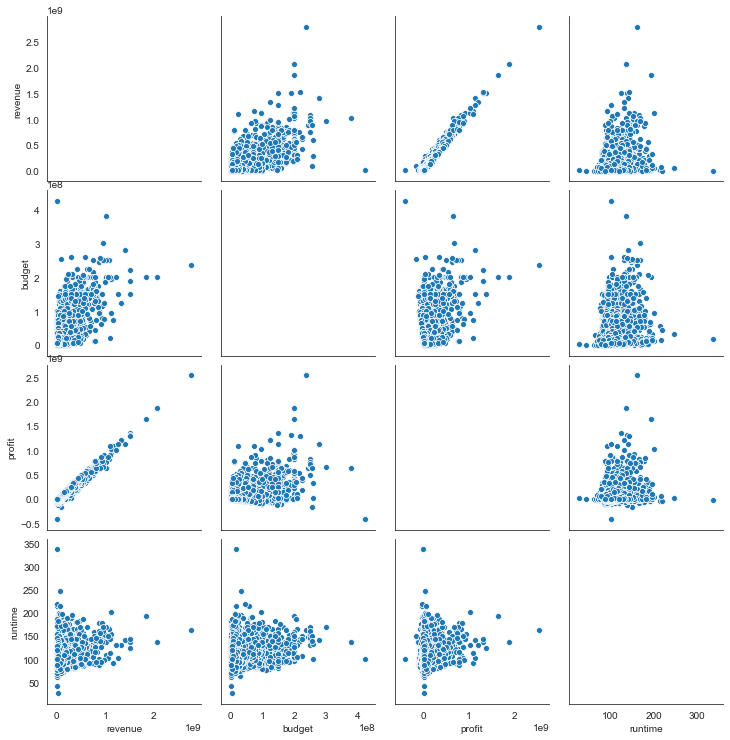

In [52]:
# Numeric columns from dataframe 
pair_plot_df = df[['revenue', 'budget', 'profit', 'runtime', 'genres']]     
pair_plot = sns.pairplot(pair_plot_df, diag_kind="reg")
pair_plot_df.groupby(['genres','profit','revenue','budget','runtime']).count()

<a id='conclusions'></a>
## Conclusions

>THe dataset is very rich with lots of information about a lot of movies. The data is well structured making it a kind of easy to wrangle. This dataset can help movie producers make sound business decisions and also assist viewers decide on a choice of movies. Recommender systems can even be built from the dataset and other interesting Machine Learning models that can be used to achieve numerous stuffs.
From the analysis we were able to clean a movie Dataset with so much details that gave a lot of insights about the movies on the IMDB.
We highlighted some research questions in the introduction section of this project and answered them based on the dataset in the EDA section and depicted them using appropriate charts. The observations from the data are as follows:
<li>The movies with the highest profit is Avatar where as The Warrior's ways had the lowest profit (they made a loss).</li>
<li> From the data, the profit made is impacted by the runtime and the budget for the movies. This implies that when producing any movie, ensure that you have enough budget for the movie in order to cater for relevant needs for the movie </li>
<li> Comedy is the most successful genre. People tend to watch movie that have much humor in them. From my personal experience, if a movie does not have elements of humor in it, I turn it down. It is reasonable that horror is one of the least watched movie among the successful genre. Horror/thrillers are rated so the number of people that watch it are limited.</li>
### Limitations of analysis
> Other interesting things that can be done from the data is to check the most appearance of actors in movies. Then further compare with the actors in most successful movies/genres in terms of profits; this can simply be used as a yardstick to determine top actors and see roles they can perform based on their genres. Unfortunately this dataset doesn't provide such ratings for actors genrally even though there could be a seperate dataset for that.